### Стоимость мобильного телефона

**Цель:** построить модели для прогнозирования **диапазона цен** на мобильные телефоны. (```"price_range"```).

    > 0 (низкая цена)
    > 1 (средняя цена)
    > 2 (высокая цена)
    > 3 (очень высокая цена)

1. Очистка, предварительная обработка данных, и Exploratory Data Analysis

2. Обучение и проверка моделей.

3. Сравнение моделей на основе метрик классификации: ```F-score```, ```Precision```, ```Recall```.


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import f1_score, precision_score, recall_score, confusion_matrix


In [2]:
print(os.listdir())

['.ipynb_checkpoints', 'main.ipynb', 'test_data.csv', 'train_data.csv']


In [3]:
train_data = pd.read_csv('train_data.csv')
test_data = pd.read_csv('test_data.csv')
train_data.head(10)

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,1938,1,0.5,1,5,0,44,0.5,121,2,...,1299,1935,3497,18,10,18,0,1,0,3
1,1831,0,1.4,1,2,0,43,0.9,150,5,...,611,1381,3834,17,7,13,1,1,1,3
2,763,0,1.7,1,8,1,2,0.5,92,8,...,1028,1186,1050,6,4,8,1,1,0,0
3,851,0,0.5,0,3,0,21,0.4,200,5,...,1171,1263,478,12,7,10,1,0,1,0
4,712,0,0.5,0,6,0,27,0.5,86,2,...,1245,1309,2001,11,10,12,1,1,1,1
5,638,0,1.7,1,11,0,27,0.5,102,4,...,1171,1383,2735,7,2,9,1,1,0,2
6,1512,1,0.5,0,1,0,52,0.1,131,1,...,333,952,3002,6,5,7,0,0,1,2
7,1856,0,0.5,1,0,1,24,0.1,155,5,...,277,1155,2052,17,6,10,1,1,0,2
8,1755,1,1.3,0,0,1,24,0.1,134,7,...,286,1075,3937,8,1,7,1,0,1,3
9,912,1,2.0,0,1,0,54,0.3,161,8,...,329,1053,2330,19,5,20,0,1,0,1


In [4]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1800 entries, 0 to 1799
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  1800 non-null   int64  
 1   blue           1800 non-null   int64  
 2   clock_speed    1800 non-null   float64
 3   dual_sim       1800 non-null   int64  
 4   fc             1800 non-null   int64  
 5   four_g         1800 non-null   int64  
 6   int_memory     1800 non-null   int64  
 7   m_dep          1800 non-null   float64
 8   mobile_wt      1800 non-null   int64  
 9   n_cores        1800 non-null   int64  
 10  pc             1800 non-null   int64  
 11  px_height      1800 non-null   int64  
 12  px_width       1800 non-null   int64  
 13  ram            1800 non-null   int64  
 14  sc_h           1800 non-null   int64  
 15  sc_w           1800 non-null   int64  
 16  talk_time      1800 non-null   int64  
 17  three_g        1800 non-null   int64  
 18  touch_sc

In [5]:
train_data.nunique()

battery_power    1041
blue                2
clock_speed        26
dual_sim            2
fc                 20
four_g              2
int_memory         63
m_dep              10
mobile_wt         121
n_cores             8
pc                 21
px_height        1074
px_width         1055
ram              1436
sc_h               15
sc_w               19
talk_time          19
three_g             2
touch_screen        2
wifi                2
price_range         4
dtype: int64

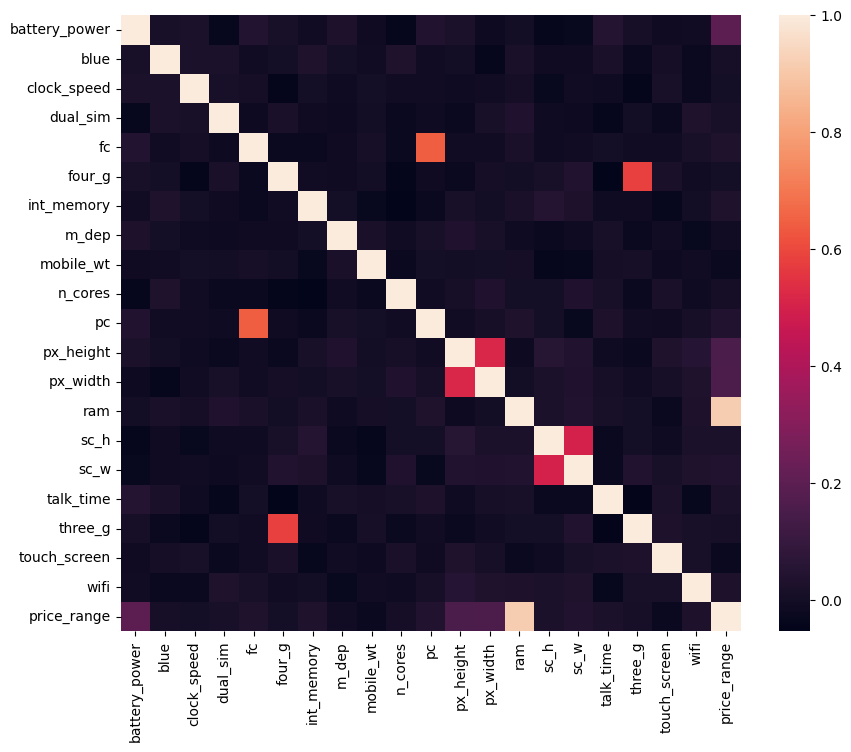

In [6]:
# Матрица корреляции
corrmat = train_data.corr()
fog = plt.figure(figsize=(10,8))
fig = sns.heatmap(corrmat)

# Наблюдается корреляция между: 
    price_range и (ram, px_width, px_height, battery_power),
    three_g и four_g,
    
   Анализ: 
       Цена на телефон зависит от оперативной памяти, диагонали телефона и энергоемкости телефона, требуется проверить влияние наличия 3G и 4G на ценообразование телефона.
    

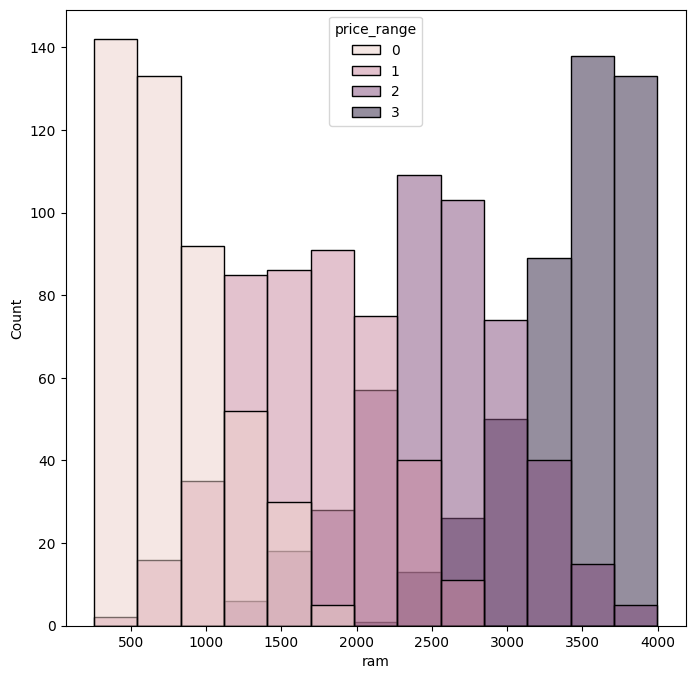

In [7]:
fig = plt.figure(figsize=(8,8))
fig = sns.histplot(x='ram', hue='price_range', data=train_data)

Анализ: На гистограмме видно что чем больше объем оперативной памяти тем выше ценовой класс.

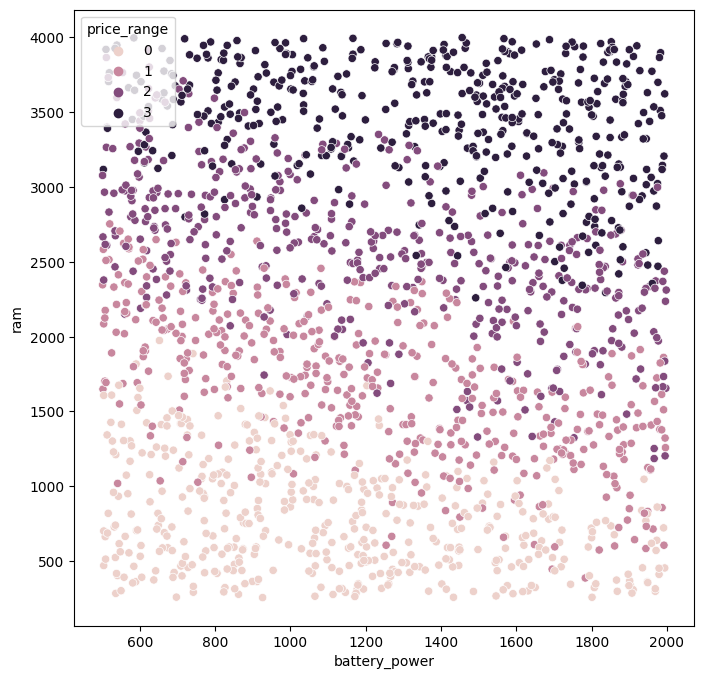

In [8]:
fig = plt.figure(figsize=(8,8))
fig = sns.scatterplot(x='battery_power',y='ram', hue='price_range', data=train_data)

Анализ: Исходя из графика можно сделать вывод, наличие большого объема оперативной памяти требует больший объем батареи, также видно что если одна из категорий имеет малое значение цена на телефон не растет, но в случае увеличения двух параметров, цена возрастает.

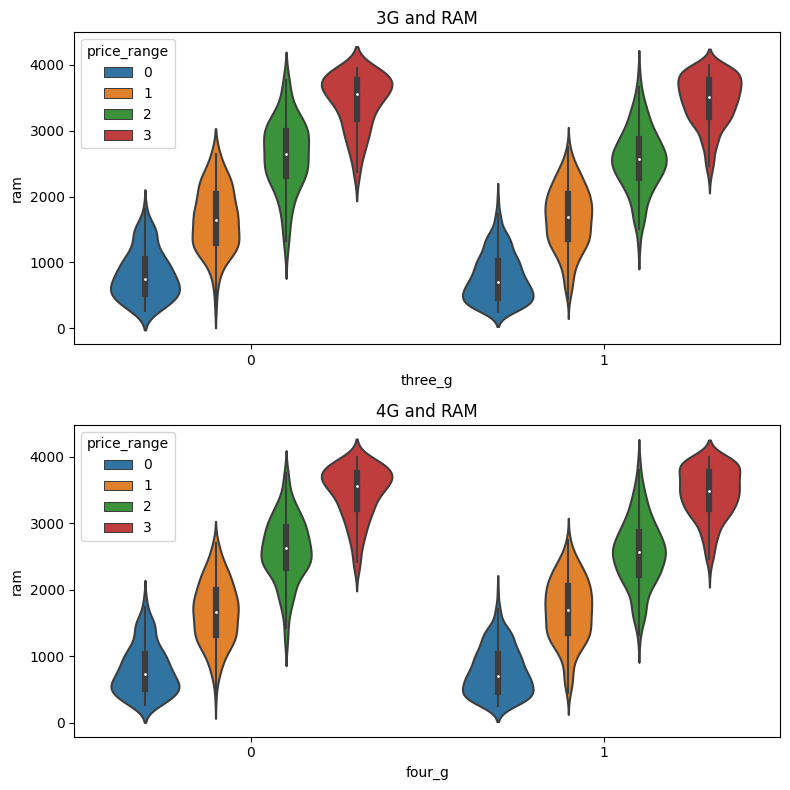

In [9]:
fig = plt.figure(figsize=(8,8))
plt.subplot(211)
fig = sns.violinplot(data=train_data, x="three_g", y="ram", hue='price_range').set_title('3G and RAM')
plt.subplot(212)
fig = sns.violinplot(data=train_data, x="four_g", y="ram", hue='price_range').set_title('4G and RAM')

plt.tight_layout()

Анализ: Особой взаимосвязи влияющей на цену при наличии 3G или 4G нет

In [10]:
# Извлечение коррелирующих параметров
train_data_copy = train_data[['battery_power', 'ram','px_width', 'px_height','three_g', 'four_g', 'price_range']]
test_data_copy = test_data[['battery_power', 'ram','px_width', 'px_height','three_g', 'four_g', 'price_range']]

In [11]:
# Разделение на зависимые и независимые переменные
X_train = train_data_copy.drop('price_range', axis=1)
X_test = test_data_copy.drop('price_range', axis=1)
y_train = train_data_copy['price_range']
y_test = test_data_copy['price_range']

Для прогнозирования диапозона цен будет выбрана многоклассовая логистическая регрессия, так как прогнозировать приходится класс в котором выше 2 классов.

In [12]:
# Построение модели многоклассовой логистической регрессии
regressor = LogisticRegression(penalty='l2', max_iter=7000)
regressor.fit(X_train, y_train)
pred = regressor.predict(X_test)

In [13]:
# Метрики
print(f'Метрика F-score: {f1_score(y_test, pred, average="macro")}')
print(f'Метрика Precision: {precision_score(y_test, pred, average="macro")}')
print(f'Метрика Recall: {recall_score(y_test, pred, average="macro")}')

Метрика F-score: 0.964451163038048
Метрика Precision: 0.965746573355843
Метрика Recall: 0.9638684188978957


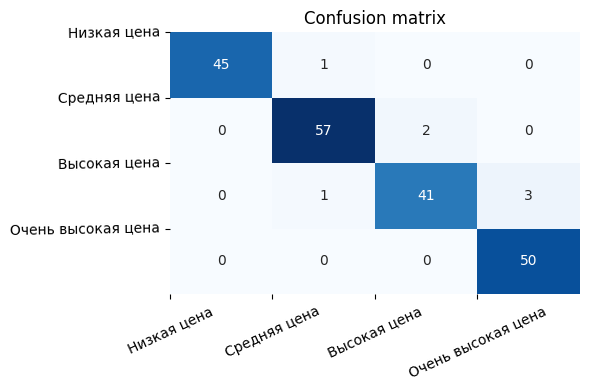

In [14]:
# Построение Confusion matrix
fig = plt.figure(figsize=(6,4))
fig = sns.heatmap(confusion_matrix(y_test,pred), annot=True, cmap='Blues', cbar=False);
fig = plt.title('Confusion matrix')
fig = plt.xticks([0, 1, 2,3], ['Низкая цена', 'Средняя цена', 'Высокая цена','Очень высокая цена'], rotation=25)
fig = plt.yticks([0, 1, 2,3], ['Низкая цена', 'Средняя цена', 'Высокая цена','Очень высокая цена'], rotation=1)
plt.tight_layout()

In [15]:
# Визуализация предсказанных значений
svm = X_test
svm['y_true'] = y_test
svm['y_pred'] = pred
svm.head()

,battery_power,ram,px_width,px_height,three_g,four_g,y_true,y_pred
0,1701,2598,1338,550,0,0,2,2
1,1484,1457,969,916,1,0,1,1
2,555,343,1010,956,0,0,0,0
3,586,2592,854,241,0,0,1,1
4,980,2268,1758,1008,1,1,2,2


Ббыла построена модель многоклассовой логистической регрессии, с результатами:
F-score: 0.964
Метрика Precision: 0.965
Метрика Recall: 0.963
Результат модели удволитворительный